In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from sources

In [2]:
%pwd

'/home/sumedhshah94/w266_project_topmusichits/src/data'

In [3]:
#Load songs and charts data (use pwd to change to find directory)
songs = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/raw/spotify_songs.csv",',')
charts = pd.read_csv("/home/sumedhshah94/w266_project_topmusichits/data/raw/billboard_hot_100_charts.csv",',')

In [4]:
# Preview songs data
songs.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [5]:
# Preview charts data
charts.head(10)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
5,http://www.billboard.com/charts/hot-100/1965-0...,8/21/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8.0,8,9
6,http://www.billboard.com/charts/hot-100/1965-0...,8/28/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8.0,8,10
7,http://www.billboard.com/charts/hot-100/1965-0...,9/4/1965,36,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,8,11
8,http://www.billboard.com/charts/hot-100/1997-0...,4/19/1997,97,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,NaN,97,1
9,http://www.billboard.com/charts/hot-100/1997-0...,4/26/1997,90,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,97.0,90,2


# Clean Songs and Charts Datasets

In [6]:
# CLEANING CHARTS DATASET
# Extract year
charts['WeekID'] = pd.to_datetime(charts['WeekID'].str.strip(),format='%m/%d/%Y')
charts['Year'] = pd.DatetimeIndex(charts['WeekID']).year
print("Original number of rows:",len(charts))


# Filter out columns and remove duplicate rows
new_charts = charts[['Year','Song','Performer','Weeks on Chart']]
new_charts = new_charts.sort_values('Weeks on Chart', ascending=False).drop_duplicates(['Year',
                                                                                        'Song',
                                                                                        'Performer'])
print("Number of rows after dropping duplicates:",len(new_charts))

# Filter out songs older than 1980 and newer than 2020
new_charts = new_charts[(new_charts['Year']>=1980) & (new_charts['Year']<=2020)]
new_charts[new_charts.duplicated(['Year','Song','Performer'])]

print("Number of rows after filtering years:",len(new_charts))

Original number of rows: 327895
Number of rows after dropping duplicates: 35787
Number of rows after filtering years: 20359


In [7]:
# Preview new charts dataframe
new_charts.head(20)

,Year,Song,Performer,Weeks on Chart
302681,2014,Radioactive,Imagine Dragons,87
302673,2014,Sail,AWOLNATION,79
278572,2009,I'm Yours,Jason Mraz,76
278565,1998,How Do I Live,LeAnn Rimes,69
297512,2014,Counting Stars,OneRepublic,68
302641,2013,Radioactive,Imagine Dragons,68
302643,2012,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
302638,2013,Sail,AWOLNATION,67
302631,2012,Rolling In The Deep,Adele,65
278557,1998,Foolish Games/You Were Meant For Me,Jewel,65


In [8]:
# Rename column
new_charts.rename(columns={'Weeks on Chart': 'Weeks_On_Chart'}, inplace=True)
new_charts.head()

,Year,Song,Performer,Weeks_On_Chart
302681,2014,Radioactive,Imagine Dragons,87
302673,2014,Sail,AWOLNATION,79
278572,2009,I'm Yours,Jason Mraz,76
278565,1998,How Do I Live,LeAnn Rimes,69
297512,2014,Counting Stars,OneRepublic,68


In [9]:
# CLEANING SONGS DATASET
print("Original size of songs dataset: ",len(songs))

# Convert to lower case
songs["track_name"] = songs["track_name"].str.lower()
songs["track_artist"] = songs["track_artist"].str.lower()

# Drop duplicate song/artist names
songs = songs.drop_duplicates(subset=['track_name','track_artist'])

# Extract year from track album release date
songs['Date'] = pd.to_datetime(songs['track_album_release_date'],
                                        format='%Y-%m-%d')
songs['song_year'] = pd.DatetimeIndex(songs['Date']).year



# Filter out songs older than 1980 and newer than 2020
songs = songs[(songs['song_year']>=1980) & (songs['song_year']<=2020)]

print("New size of songs dataset: ",len(songs))

Original size of songs dataset:  18454
New size of songs dataset:  15823


# Merge datasets

In [10]:
# Make song and performer lowercase
new_charts["Song"] = new_charts["Song"].str.lower()
new_charts["Performer"] = new_charts["Performer"].str.lower()

In [11]:
# Merge dataframes (left) and check record sizes
songs_charts = songs.merge(new_charts,
                        left_on=['track_name','track_artist'],
                        right_on=['Song','Performer'],how='left')

# Check new length of merged dataset
print(len(songs_charts))


16601


In [12]:
# Indicate whether song is on Billboard charts or not
songs_charts['Hit'] = np.where(songs_charts['Weeks_On_Chart'].isnull(),0,1)

In [13]:
# Rename column
songs_charts.rename(columns={'Year': 'trending_year'}, inplace=True)

# Drop some merged columns
songs_charts = songs_charts.drop(columns=['Date','track_id','track_album_id','track_album_release_date',
                                          'playlist_id','Song','Performer'])

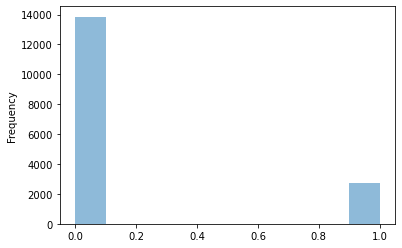

In [39]:
# See difference in number of hits vs non-hits in merged dataset
ax = songs_charts['Hit'].plot.hist(alpha=0.5)

In [35]:
# Fill na values with 0 and attempt to convert column type to int
songs_charts['Weeks_On_Chart'] = songs_charts['Weeks_On_Chart'].fillna(0)
songs_charts['Weeks_On_Chart'] = songs_charts['Weeks_On_Chart'].apply(pd.to_numeric)

In [24]:
songs_charts.head(15)

,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,instrumentalness,liveness,valence,tempo,duration_ms,language,song_year,trending_year,Weeks_On_Chart,Hit
0,pangarap,barbie's cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,Pinoy Classic Rock,rock,classic rock,0.682,0.401,...,0.011700,0.0887,0.566,97.091,235440,tl,2001,NaN,NaN,0
1,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,Hard Rock Workout,rock,hard rock,0.303,0.880,...,0.009940,0.3470,0.404,135.225,373512,en,2017,NaN,NaN,0
2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,0.652,...,0.007230,0.4890,0.650,111.904,262467,en,2005,1990.0,22.0,1
3,baby it's cold outside (feat. christina aguilera),ceelo green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,Christmas Soul,r&b,neo soul,0.425,0.378,...,0.000000,0.0664,0.405,118.593,243067,en,2012,NaN,NaN,0
4,dumb litty,kard,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,K-Party Dance Mix,pop,dance pop,0.760,0.887,...,0.000000,0.1380,0.240,130.018,193160,en,2019,NaN,NaN,0
5,soldier,james tw,"Hold your breath, don't look down, keep trying...",70,Chapters,urban contemporary,r&b,urban contemporary,0.496,0.639,...,0.000000,0.0975,0.305,147.764,224720,en,2019,NaN,NaN,0
6,satisfy you,diddy,All I want is somebody who's gonna love me for...,52,Forever,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",r&b,new jack swing,0.764,0.594,...,0.000000,0.1450,0.695,87.261,286441,en,1999,NaN,NaN,0
7,tender lover,babyface,Feels good Everybody Tender lover Tender love ...,36,Tender Lover,New Jack Swing,r&b,new jack swing,0.743,0.860,...,0.000422,0.0513,0.687,102.459,259267,en,1989,1990.0,17.0,1
8,tender lover,babyface,Feels good Everybody Tender lover Tender love ...,36,Tender Lover,New Jack Swing,r&b,new jack swing,0.743,0.860,...,0.000422,0.0513,0.687,102.459,259267,en,1989,1989.0,7.0,1
9,hide away (feat. envy monroe),blasterjaxx,"Don't run away, it's getting colder Our hearts...",42,Hide Away (feat. Envy Monroe),Big Room EDM - by Spinnin' Records,edm,big room,0.573,0.746,...,0.000000,0.3610,0.134,130.001,188000,en,2019,NaN,NaN,0


In [38]:
# Save dataset to raw/interim
songs_charts.to_csv("/home/sumedhshah94/w266_project_topmusichits/data/interim/songs_charts.csv")

## Misc Analysis

In [ ]:
# Merge dataframes (inner) and check record sizes
songs_charts_trial = songs.merge(new_charts,
                        left_on=['track_name','track_artist'],
                        right_on=['Song','Performer'],how='inner')

# Check that majority of charted songs are in merged dataset
print(len(songs_charts_trial))

In [ ]:
# Check duplicate records
duplicate = songs_charts_trial[songs_charts_trial.duplicated(['track_name','track_artist'])].sort_values('track_name')
duplicate.head(10)

In [ ]:
# Check specific songs that have duplicate records
new_charts[new_charts.Song=='22']